In [1]:
#pip install git+https://github.com/JustAnotherArchivist/snscrape.git

In [2]:
#nltk.download()

In [263]:
import pandas as pd
import numpy as nd
import re
import string
import os
import emoji
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics.pairwise import cosine_similarity

# First Pass Through Workflow - CatGirlCoin (testing coin, choosen for high retail involvement)

## Gathering Tweets

In [4]:
#os.system("snscrape --jsonl --max-results 10000 twitter-search '#CATGIRLCOIN'> catgirlcoin-tweets.json")

In [5]:
catgirl_df = pd.read_json('catgirlcoin-tweets.json', lines=True)
catgirl_df.sample(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
903,snscrape.modules.twitter.Tweet,https://twitter.com/soahead777/status/14572367...,2021-11-07 06:41:39+00:00,@intocryptoverse #CATGIRLCOIN 😺🐈🚀📈📈🚀🐈🐈😺🐈🐈🚀📈📈🚀🐈...,@intocryptoverse #CATGIRLCOIN 😺🐈🚀📈📈🚀🐈🐈😺🐈🐈🚀📈📈🚀🐈...,1457236788204883969,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,2,...,None,NaN,None,1.457113e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[CATGIRLCOIN],None
4469,snscrape.modules.twitter.Tweet,https://twitter.com/vikascpandey/status/145423...,2021-10-29 23:53:50+00:00,@TuxPaper #catgirls #CATGIRLCOIN,@TuxPaper #catgirls #CATGIRLCOIN,1454235058169171976,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,7,...,None,NaN,None,1.454232e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[catgirls, CATGIRLCOIN]",None
6090,snscrape.modules.twitter.Tweet,https://twitter.com/CatgirlJapan/status/145287...,2021-10-26 05:54:00+00:00,#catgirlcoin\n日本のホルダーさん、元気ですか？🔥🔥🔥 https://t.co...,#catgirlcoin\n日本のホルダーさん、元気ですか？🔥🔥🔥 https://t.co...,1452876143351062529,"{'_type': 'snscrape.modules.twitter.User', 'us...",9,30,65,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,None,None,None,[catgirlcoin],None
335,snscrape.modules.twitter.Tweet,https://twitter.com/NurudeenAfeez5/status/1457...,2021-11-08 07:08:14+00:00,@ami_inuu #CATGIRLCOIN,@ami_inuu #CATGIRLCOIN,1457605867369418752,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,7,...,None,NaN,None,1.457522e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[CATGIRLCOIN],None
2958,snscrape.modules.twitter.Tweet,https://twitter.com/Joeri39348210/status/14555...,2021-11-02 17:42:55+00:00,#CATGIRLCOIN,#CATGIRLCOIN,1455591264183898118,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,5,...,None,NaN,None,NaN,None,None,None,None,[CATGIRLCOIN],None
4133,snscrape.modules.twitter.Tweet,https://twitter.com/EmmaJon25107141/status/145...,2021-10-31 00:39:20+00:00,Congratulations! #catgirlcoin https://t.co/O9N...,Congratulations! #catgirlcoin twitter.com/catg...,1454608896585191430,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,3,10,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,None,None,[catgirlcoin],None
6770,snscrape.modules.twitter.Tweet,https://twitter.com/Cryptosmania1/status/14507...,2021-10-20 07:58:44+00:00,"@Valeriecrypto Launch on May 31st, the @catgir...","@Valeriecrypto Launch on May 31st, the @catgir...",1450733206311895041,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,"[{'_type': 'snscrape.modules.twitter.Video', '...",NaN,None,1.450716e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[catgirlcoin, anime]",None
8210,snscrape.modules.twitter.Tweet,https://twitter.com/Ilal65260877/status/140387...,2021-06-13 00:54:13+00:00,"tiktok contest, hurry up and attack before Jun...","tiktok contest, hurry up and attack before Jun...",1403878341023727618,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,None,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[catgirlcoin, Contest, Tiktok, BSC]",None
4758,snscrape.modules.twitter.Tweet,https://twitter.com/animemaster1441/status/145...,2021-10-29 09:56:41+00:00,"@ashwsbreal #CATGIRLCOIN , we are kilking zeros.","@ashwsbreal #CATGIRLCOIN , we are kilking zeros.",1454024380749467651,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.454008e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[CATGIRLCOIN],N

In [6]:
catgirl_df.describe()

,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,retweetedTweet,inReplyToTweetId
count,8.630000e+03,8630.000000,8630.000000,8630.000000,8630.000000,8.630000e+03,0.0,5.635000e+03
mean,1.447880e+18,1.388876,3.317149,10.485632,0.102317,1.446399e+18,NaN,1.445249e+18
std,1.689706e+16,38.631112,45.025468,63.607736,0.988323,2.515681e+16,NaN,2.842473e+16
min,1.399375e+18,0.000000,0.000000,0.000000,0.000000,1.055634e+18,NaN,1.055654e+18
25%,1.452402e+18,0.000000,0.000000,3.000000,0.000000,1.451833e+18,NaN,1.451352e+18
50%,1.454363e+18,0.000000,0.000000,5.000000,0.000000,1.454183e+18,NaN,1.454119e+18
75%,1.456259e+18,0.000000,2.000000,8.000000,0.000000,1.456192e+18,NaN,1.456486e+18
max,1.457821e+18,3482.000000,3782.000000,3616.000000,40.000000,1.457815e+18,NaN,1.457816e+18


In [7]:
catgirl_df2 = catgirl_df[['url', 'date', 'content', 'likeCount']]

In [8]:
catgirl_df2.head()

,url,date,content,likeCount
0,https://twitter.com/Ajquack1/status/1457821486...,2021-11-08 21:25:02+00:00,@DaCryptoGeneral Go #catgirlarmy! #catgirlcoin...,0
1,https://twitter.com/Keiplan1/status/1457820610...,2021-11-08 21:21:33+00:00,@DaCryptoGeneral #CATGIRLCOIN has the cutest N...,0
2,https://twitter.com/cryptokong83/status/145781...,2021-11-08 21:18:30+00:00,@DaCryptoGeneral Too easy #catgirltoken #catgi...,1
3,https://twitter.com/Jalal136206/status/1457817...,2021-11-08 21:10:50+00:00,@Khloecrypto #CATGIRLCOIN,0
4,https://twitter.com/Jalal136206/status/1457817...,2021-11-08 21:10:14+00:00,@Khloecrypto #catgirltoken #CATGIRLCOIN,0


In [9]:
catgirl_df2.describe()

,likeCount
count,8630.000000
mean,10.485632
std,63.607736
min,0.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,3616.000000


In [10]:
#Filtering for tweets with 3 or more likes
catgirl_df3 = catgirl_df2[catgirl_df2.likeCount > 2]

In [11]:
catgirl_df3.describe()

,likeCount
count,6481.000000
mean,13.527542
std,73.146265
min,3.000000
25%,4.000000
50%,6.000000
75%,10.000000
max,3616.000000


In [200]:
catgirl_df3.reset_index(drop = True, inplace = True)

In [201]:
catgirl_df3.head()

,url,date,content,likeCount,tokens,clean_content
0,https://twitter.com/mka18203739/status/1457815...,2021-11-08 20:59:21+00:00,@catgirlcoin #CATGIRLCOIN\n\nWAIT FOR STAKING ...,4,"[catgirlcoin, catgirlcoin, wait, for, staking,...",catgirlcoin catgirlcoin\n\nwait for staking ...
1,https://twitter.com/PlutusHands/status/1457814...,2021-11-08 20:59:08+00:00,@catgirlcoin And we are just getting started 😍...,15,"[catgirlcoin, and, we, are, just, getting, sta...",catgirlcoin and we are just getting started :...
2,https://twitter.com/Hadi71504652/status/145781...,2021-11-08 20:49:05+00:00,@catgirlcoin #CATGIRLCOIN #BNB #BSC #anime #NF...,3,"[catgirlcoin, catgirlcoin, bnb, bsc, anime, nf...",catgirlcoin catgirlcoin bnb bsc anime nf...
3,https://twitter.com/Jalal136206/status/1457812...,2021-11-08 20:47:54+00:00,@catgirlcoin #CATGIRLCOIN #BNB #BSC #anime #NF...,4,"[catgirlcoin, catgirlcoin, bnb, bsc, anime, nf...",catgirlcoin catgirlcoin bnb bsc anime nf...
4,https://twitter.com/officialstyleeb/status/145...,2021-11-08 20:44:06+00:00,@catgirlcoin Like you could have done a video ...,9,"[catgirlcoin, like, you, could, have, done, a,...",catgirlcoin like you could have done a video ...


### Attempt to automate scrape

In [13]:
# def scrape_to_df(max_results, search_term, dataframe_name):
#     os.system("snscrape --jsonl --max-results {} twitter-search '{}'> tweets.json".format(max_results, search_term))
#     dataframe_name = pd.read_json('tweets.json', lines=True)
#     return dataframe_name

In [14]:
# scrape_to_df(10, '#AXS', 'AXS_df')

## Text Preprocessing

In [16]:
catgirl_df3.head()

,url,date,content,likeCount,tokens
9,https://twitter.com/mka18203739/status/1457815...,2021-11-08 20:59:21+00:00,@catgirlcoin #CATGIRLCOIN\n\nWAIT FOR STAKING ...,4,
10,https://twitter.com/PlutusHands/status/1457814...,2021-11-08 20:59:08+00:00,@catgirlcoin And we are just getting started 😍...,15,
14,https://twitter.com/Hadi71504652/status/145781...,2021-11-08 20:49:05+00:00,@catgirlcoin #CATGIRLCOIN #BNB #BSC #anime #NF...,3,
15,https://twitter.com/Jalal136206/status/1457812...,2021-11-08 20:47:54+00:00,@catgirlcoin #CATGIRLCOIN #BNB #BSC #anime #NF...,4,
18,https://twitter.com/officialstyleeb/status/145...,2021-11-08 20:44:06+00:00,@catgirlcoin Like you could have done a video ...,9,


In [17]:
clean_content = []

for tweet in catgirl_df3.content.values:
    clean_tweet = tweet.lower()
    cleaner_tweet = re.sub('[%s]' % re.escape(string.punctuation),' ', clean_tweet)
    cleanest_tweet = emoji.demojize(cleaner_tweet)
    clean_content.append(cleanest_tweet)

In [18]:
clean_content[:5]

[' catgirlcoin  catgirlcoin\n\nwait for staking farm release\n\nsoon pricr  0 0001',
 ' catgirlcoin and we are just getting started :smiling_face_with_heart-eyes:  catgirlcoin  catgirlarmy  catgirl  catgirlcoin https   t co m4dbg5ocxz',
 ' catgirlcoin  catgirlcoin  bnb  bsc  anime  nft  pancakeswap',
 ' catgirlcoin  catgirlcoin  bnb  bsc  anime  nft  pancakeswap',
 ' catgirlcoin like you could have done a video or something with a count down  make it engaging  come on  catgirlcoin let’s get this going  a teaser to show what people might get on the drop \nsomething  marketing is important   catgirlcoin']

In [19]:
catgirl_df3['clean_content'] = clean_content

/var/folders/lt/hfkrhpgn6214fmc77y61gssc0000gp/T/ipykernel_9548/3756197452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catgirl_df3['clean_content'] = clean_content


In [20]:
catgirl_df3.head()

,url,date,content,likeCount,tokens,clean_content
9,https://twitter.com/mka18203739/status/1457815...,2021-11-08 20:59:21+00:00,@catgirlcoin #CATGIRLCOIN\n\nWAIT FOR STAKING ...,4,,catgirlcoin catgirlcoin\n\nwait for staking ...
10,https://twitter.com/PlutusHands/status/1457814...,2021-11-08 20:59:08+00:00,@catgirlcoin And we are just getting started 😍...,15,,catgirlcoin and we are just getting started :...
14,https://twitter.com/Hadi71504652/status/145781...,2021-11-08 20:49:05+00:00,@catgirlcoin #CATGIRLCOIN #BNB #BSC #anime #NF...,3,,catgirlcoin catgirlcoin bnb bsc anime nf...
15,https://twitter.com/Jalal136206/status/1457812...,2021-11-08 20:47:54+00:00,@catgirlcoin #CATGIRLCOIN #BNB #BSC #anime #NF...,4,,catgirlcoin catgirlcoin bnb bsc anime nf...
18,https://twitter.com/officialstyleeb/status/145...,2021-11-08 20:44:06+00:00,@catgirlcoin Like you could have done a video ...,9,,catgirlcoin like you could have done a video ...


In [15]:
catgirl_df3['tokens']= ""

/var/folders/lt/hfkrhpgn6214fmc77y61gssc0000gp/T/ipykernel_9548/459651183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catgirl_df3['tokens']= ""


In [ ]:
tokens = []
for tweet in catgirl_df3['clean_content'].values:
    tokens.append(word_tokenize(tweet))
tokens

In [22]:
catgirl_df3['tokens'] = tokens

/var/folders/lt/hfkrhpgn6214fmc77y61gssc0000gp/T/ipykernel_9548/960451204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catgirl_df3['tokens'] = tokens


In [23]:
catgirl_df3.head()

,url,date,content,likeCount,tokens,clean_content
9,https://twitter.com/mka18203739/status/1457815...,2021-11-08 20:59:21+00:00,@catgirlcoin #CATGIRLCOIN\n\nWAIT FOR STAKING ...,4,"[catgirlcoin, catgirlcoin, wait, for, staking,...",catgirlcoin catgirlcoin\n\nwait for staking ...
10,https://twitter.com/PlutusHands/status/1457814...,2021-11-08 20:59:08+00:00,@catgirlcoin And we are just getting started 😍...,15,"[catgirlcoin, and, we, are, just, getting, sta...",catgirlcoin and we are just getting started :...
14,https://twitter.com/Hadi71504652/status/145781...,2021-11-08 20:49:05+00:00,@catgirlcoin #CATGIRLCOIN #BNB #BSC #anime #NF...,3,"[catgirlcoin, catgirlcoin, bnb, bsc, anime, nf...",catgirlcoin catgirlcoin bnb bsc anime nf...
15,https://twitter.com/Jalal136206/status/1457812...,2021-11-08 20:47:54+00:00,@catgirlcoin #CATGIRLCOIN #BNB #BSC #anime #NF...,4,"[catgirlcoin, catgirlcoin, bnb, bsc, anime, nf...",catgirlcoin catgirlcoin bnb bsc anime nf...
18,https://twitter.com/officialstyleeb/status/145...,2021-11-08 20:44:06+00:00,@catgirlcoin Like you could have done a video ...,9,"[catgirlcoin, like, you, could, have, done, a,...",catgirlcoin like you could have done a video ...


## Topic Modeling

In [24]:
corpus = []
for i in range(len(catgirl_df3.tokens.values)):
    corpus.append(' '.join(catgirl_df3.tokens.values[i]))

In [25]:
corpus[:5]

['catgirlcoin catgirlcoin wait for staking farm release soon pricr 0 0001',
 'catgirlcoin and we are just getting started : smiling_face_with_heart-eyes : catgirlcoin catgirlarmy catgirl catgirlcoin https t co m4dbg5ocxz',
 'catgirlcoin catgirlcoin bnb bsc anime nft pancakeswap',
 'catgirlcoin catgirlcoin bnb bsc anime nft pancakeswap',
 'catgirlcoin like you could have done a video or something with a count down make it engaging come on catgirlcoin let ’ s get this going a teaser to show what people might get on the drop something marketing is important catgirlcoin']

In [26]:
vectorizer = CountVectorizer(stop_words='english')
doc_word = vectorizer.fit_transform(corpus)

In [28]:
nmf_model = NMF(3)
doc_topic = nmf_model.fit_transform(doc_word)

/Users/michaelkamel/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [29]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3"],
             columns = vectorizer.get_feature_names())
topic_word

,00,000,000000000000,000000000014,000000000015,00000000004365,000000004,000000004748,0000000048,000000007,...,金曜土曜は強いイメージあるぞ,関連で,限定エアドロップ,除了catgirl外,難易度,非同质化代币,順調にボルダー数が伸びている,頑張って下さいね,飛んでるぅーー,𝙖𝙡𝙧𝙚𝙖𝙙𝙮
component_1,0.000,0.002,0.002,0.000,0.000,0.000,0.000,0.000,0.001,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.001,0.000
component_2,0.002,0.072,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.001,0.001,0.001,0.001,0.001,0.001,0.000,0.001,0.001,0.001
component_3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [30]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [31]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)



Topic  0
rocket, cat, grinning_cat, chart_increasing, collision, catgirlcoin, moon, dollar_banknote, airplane, coinmarketcap

Topic  1
catgirlcoin, https, catgirl, nft, elonmusk, bsc, crypto, bnb, catgirlarmy, moon

Topic  2
eyes, smiling_face_with_heart, collision, catgirlcoin, smiling_cat_with_heart, catgirl, airplane, dollar_banknote, catgirlcoinfans, struck


In [32]:
H = pd.DataFrame(doc_topic.round(5),
             columns = ["component_1","component_2","component_3" ])
H

,component_1,component_2,component_3
0,0.00009,0.16584,0.00027
1,0.00000,0.29954,0.14677
2,0.00000,0.18612,0.00000
3,0.00000,0.18612,0.00000
4,0.00004,0.25119,0.00000
...,...,...,...
6476,0.07213,0.20944,0.00000
6477,0.00010,0.17515,0.00000
6478,0.07281,0.20716,0.00000
6479,0.00150,0.10134,0.00000


## Topic Modeling 2 (with new stop words & more topics)

In [34]:
corpus[:5]

['catgirlcoin catgirlcoin wait for staking farm release soon pricr 0 0001',
 'catgirlcoin and we are just getting started : smiling_face_with_heart-eyes : catgirlcoin catgirlarmy catgirl catgirlcoin https t co m4dbg5ocxz',
 'catgirlcoin catgirlcoin bnb bsc anime nft pancakeswap',
 'catgirlcoin catgirlcoin bnb bsc anime nft pancakeswap',
 'catgirlcoin like you could have done a video or something with a count down make it engaging come on catgirlcoin let ’ s get this going a teaser to show what people might get on the drop something marketing is important catgirlcoin']

In [70]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('catgirlcoin')

In [71]:
vectorizer2 = CountVectorizer(stop_words=stopwords)
doc_word2 = vectorizer2.fit_transform(corpus)

In [82]:
nmf_model2 = NMF(20)
doc_topic2 = nmf_model2.fit_transform(doc_word2)

/Users/michaelkamel/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [73]:
topic_word2 = pd.DataFrame(nmf_model2.components_.round(3),
             index = ["component_1","component_2","component_3"],
             columns = vectorizer2.get_feature_names())
topic_word2

,00,000,000000000000,000000000014,000000000015,00000000004365,000000004,000000004748,0000000048,000000007,...,金曜土曜は強いイメージあるぞ,関連で,限定エアドロップ,除了catgirl外,難易度,非同质化代币,順調にボルダー数が伸びている,頑張って下さいね,飛んでるぅーー,𝙖𝙡𝙧𝙚𝙖𝙙𝙮
component_1,0.000,0.006,0.002,0.000,0.000,0.0,0.000,0.0,0.001,0.0,...,0.000,0.000,0.000,0.0,0.000,0.000,0.002,0.0,0.001,0.000
component_2,0.003,0.086,0.001,0.002,0.002,0.0,0.002,0.0,0.000,0.0,...,0.001,0.001,0.003,0.0,0.003,0.003,0.001,0.0,0.002,0.001
component_3,0.000,0.002,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0,...,0.001,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000


In [83]:
display_topics(nmf_model2, vectorizer2.get_feature_names(), 10)


Topic  0
rocket, coinmarketcap, catgirls, gem_stone, shibarmy, statue_of_liberty, fatego, genshinimpact, ffxiv, coingecko

Topic  1
co, https, love, website, gm7nmcyjih, catgirlswap, check, finally, nftcommunity, twitter

Topic  2
eyes, smiling_face_with_heart, catgirlcoinfans, yatirimci0610, plutushands, thegasgrenade, rmdrk, metavarse, catgril, r2v5jjz9tv

Topic  3
cat, grinning_cat, chart_increasing, cryptogems555, black_cat, dog, inukishu, shibaarchives, trending, girl

Topic  4
catgirl, know, coin, workshop, lottery, song, theme, decorate, future, crypto

Topic  5
fire, flying_saucer, weary_cat, gem_stone, 0x79ebc9a2ce02277a4b5b3a768b1c0a4ed75bd936, check_mark_button, address, contract, mkhvgawivv, one

Topic  6
collision, money_bag, money_with_wings, catgirlcoinfans, catgirl, dollar_banknote, plutushands, chinapumpwxc, exchange, lbank

Topic  7
nft, anime, farming, catgirlswap, amp, marketplace, mystery, interested, nftcommunity, bscgems

Topic  8
elonmusk, phantomx91, intereste

# Automate Workflow Using Functions - Cardano (Moving toward more institutional coin)

## Gathering Tweets

In [92]:
#os.system("snscrape --jsonl --max-results 100000 twitter-search '#cardano'> cardano-tweets.json")

0

In [93]:
cardano_df = pd.read_json('cardano-tweets.json', lines=True)
cardano_df

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/LacedWhales/status/1458212...,2021-11-09 23:17:32+00:00,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...,1458212189219790850,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,"[Cardano, fintech, blockchain, crypto]",[ADA]
1,snscrape.modules.twitter.Tweet,https://twitter.com/Seed_Pool/status/145821218...,2021-11-09 23:17:32+00:00,[SEED] 👨‍🌾 New 1 Minted Block\n\n⛏ Blocks in E...,[SEED] 👨‍🌾 New 1 Minted Block\n\n⛏ Blocks in E...,1458212186606669828,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,"[Cardano, Crypto, altcoin]",[ADA]
2,snscrape.modules.twitter.Tweet,https://twitter.com/JasonCrypto13/status/14582...,2021-11-09 23:16:00+00:00,SUNSHIELD FINANCE TOKEN\n\nJUST LISTED ON COIN...,SUNSHIELD FINANCE TOKEN\n\nJUST LISTED ON COIN...,1458211800906801155,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,None,None,None,"[doge, Ethereum, BTC, ETH, Bitcoin, Crypto, BN...",None
3,snscrape.modules.twitter.Tweet,https://twitter.com/Aldirahman27/status/145821...,2021-11-09 23:15:53+00:00,@CadaNews @adaswapapp This is definitely going...,@CadaNews @adaswapapp This is definitely going...,1458211773043994626,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.446534e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[AdaSwap, Cardano, CardanoDEX]",None
4,snscrape.modules.twitter.Tweet,https://twitter.com/JayMyRealtor/status/145821...,2021-11-09 23:15:47+00:00,"Should I buy more #Cardano, #Filecoin, or #XRP ?","Should I buy more #Cardano, #Filecoin, or #XRP ?",1458211747874099202,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,"[Cardano, Filecoin, XRP]",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,snscrape.modules.twitter.Tweet,https://twitter.com/InfoCriptDivisa/status/145...,2021-10-18 13:38:23+00:00,El objetivo de este acuerdo de asociación es b...,El objetivo de este acuerdo de asociación es b...,1450093904808878082,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,None,None,"[blockchain, blockchain, empoderamiento, cardano]",None
99996,snscrape.modules.twitter.Tweet,https://twitter.com/mesdgn2304/status/14500938...,2021-10-18 13:38:16+00:00,#Bitcoin salmazsa bu ikili uzaya çıkar. Portfö...,#Bitcoin salmazsa bu ikili uzaya çıkar. Portfö...,1450093878275620868,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,None,None,"[Bitcoin, BTC, XRP, AVAX, SXP, ETH, Crypto, al...",None
99997,snscrape.modules.twitter.Tweet,https://twitter.com/CorunaWorld/status/1450093...,2021-10-18 13:38:14+00:00,#Cardanocommunity #crypto #Cardano https://t....,#Cardanocommunity #crypto #Cardano twitter.co...,1450093868041609216,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,"[Cardanocommunity, crypto, Cardano]",None
99998,snscrape.modules.twitter.Tweet,https://twitter.com/gems_nft/status/1450093854...,2021-10-18 13:38:10+00:00,✅ 10 cuts\n✅ 10 gems\n\n💎 100 unique cards 💎\n...,✅ 10 cuts\n✅ 10 gems\n\n💎 100 unique cards 💎\n...,1450093854007435273,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,1,1,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,None,None,None,"[nft, cardano, CardanoNFT, gemstones, NFTcolle...",None


### Function to take Json output and convert to clean dataframe ready for topic modeling

In [202]:
def json_to_clean_df(df):
    df = df[['url', 'date', 'content', 'likeCount']]
    df = df[df.likeCount > 2]
    df.reset_index(drop = True, inplace = True)
    
    clean_content = []
    for tweet in df.content.values:
        clean_tweet = tweet.lower()
        cleaner_tweet = re.sub('[%s]' % re.escape(string.punctuation),' ', clean_tweet)
        cleanest_tweet = emoji.demojize(cleaner_tweet)
        clean_content.append(cleanest_tweet)
    df['clean_content'] = clean_content
    
    tokens = []
    for tweet in df['clean_content'].values:
        tokens.append(word_tokenize(tweet))
    df['tokens'] = tokens
    
    return df

In [203]:
cardano_df2 = json_to_clean_df(cardano_df)
cardano_df2

,url,date,content,likeCount,clean_content,tokens
0,https://twitter.com/Co2Pool/status/14582117054...,2021-11-09 23:15:37+00:00,Great thread about the GlobalImpactChallenge a...,3,great thread about the globalimpactchallenge a...,"[great, thread, about, the, globalimpactchalle..."
1,https://twitter.com/RyanJones_NEWM/status/1458...,2021-11-09 23:11:41+00:00,#Cardano went up in price today. Just another ...,5,cardano went up in price today just another ...,"[cardano, went, up, in, price, today, just, an..."
2,https://twitter.com/CardanoFeed/status/1458210...,2021-11-09 23:10:15+00:00,Cardano Developer IOHK And Zanzibar's High-Ran...,3,cardano developer iohk and zanzibar s high ran...,"[cardano, developer, iohk, and, zanzibar, s, h..."
3,https://twitter.com/CarvaoGuilherme/status/145...,2021-11-09 23:07:53+00:00,Criptos no radar #Litecoin #Cardano #radicle (...,3,criptos no radar litecoin cardano radicle ...,"[criptos, no, radar, litecoin, cardano, radicl..."
4,https://twitter.com/ChadyBoe_/status/145820974...,2021-11-09 23:07:50+00:00,This Post is Undervalued❗️ #Cardano $ADA #ADA ...,3,this post is undervalued:red_exclamation_mark:...,"[this, post, is, undervalued, :, red_exclamati..."
...,...,...,...,...,...,...
34270,https://twitter.com/adasnakepool/status/145009...,2021-10-18 13:41:06+00:00,#CARDANO #ADA $ADA #STAKEPOOL #STAKING\n#altco...,3,cardano ada ada stakepool staking\n altco...,"[cardano, ada, ada, stakepool, staking, altcoi..."
34271,https://twitter.com/PZaxster/status/1450094453...,2021-10-18 13:40:33+00:00,"▶️Rosseti""s fifth 🧩with name Tire.\n\n1⃣From t...",6,:play_button:rosseti s fifth :puzzle_piece:wit...,"[:, play_button, :, rosseti, s, fifth, :, puzz..."
34272,https://twitter.com/UglywoodUSA/status/1450094...,2021-10-18 13:40:18+00:00,#ADA will flip #ETH in our lifetime. Cardano i...,4,ada will flip eth in our lifetime cardano i...,"[ada, will, flip, eth, in, our, lifetime, card..."
34273,https://twitter.com/cryptoMaxi420/status/14500...,2021-10-18 13:40:06+00:00,Here is a prime example why blind investing do...,11,here is a prime example why blind investing do...,"[here, is, a, prime, example, why, blind, inve..."


### Function to take clean dataframe and output topics

In [90]:
def df_to_nmf_topics(df, num_of_topics, words_per_token):
    corpus = []
    for i in range(len(df.tokens.values)):
        corpus.append(' '.join(df.tokens.values[i]))
    vectorizer = CountVectorizer(stop_words='english')
    doc_word = vectorizer.fit_transform(corpus)
    nmf_model = NMF(num_of_topics)
    doc_topic = nmf_model.fit_transform(doc_word)
    return display_topics(nmf_model, vectorizer.get_feature_names(), words_per_token)

In [95]:
df_to_nmf_topics(cardano_df2, 20, 10)

/Users/michaelkamel/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
https, cardano, discord, join, mxs, crossed_swords, mxsamurai, check, tg, reddit

Topic  1
ada, cardano, price, sol, staking, カルダノ, buy, time, hosky, 10

Topic  2
eth, btc, doge, cardano, dogecoin, sol, bitcoin, ltc, xrp, binance

Topic  3
cnft, cardano, io, cnftcommunity, cardanonft, project, art, just, drop, halloween

Topic  4
cardano, just, project, community, charles, time, people, iohk, like, don

Topic  5
rocket, collision, full_moon, eyes, cardano, coti, moon, backhand_index_pointing_down, shiba, chart_increasing

Topic  6
money, mouth_face, mxs, backhand_index_pointing_down, ninja, crypto, mxsamurai, binance, 我们带你去那里, 下面加入我们

Topic  7
nfts, nftart, metaverse, digitalart, cnfts, ai, artificialintelligence, vision, deepvisionai, deep

Topic  8
crypto, cryptocurrency, blockchain, cryptonews, bitcoin, altcoin, cardano, btc, cardanofeed, price

Topic  9
nft, nftcommunity, nftcollector, crypto, nftart, art, nfts, nftartist, mint, nftcollectors

Topic  10
amp, police_car_li

# Testing a More Institutional Crypto Asset - Solana

## Gathering Tweets

In [96]:
#os.system("snscrape --jsonl --max-results 100000 twitter-search '#solana'> solana-tweets.json")

0

In [97]:
solana_df = pd.read_json('solana-tweets.json', lines=True)
solana_df

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/AminGho13210788/status/145...,2021-11-10 19:40:44+00:00,send it \n@sarma57789342\n@Aryankaka1390\n@kak...,send it \n@sarma57789342\n@Aryankaka1390\n@kak...,1458520016589099010,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[KINARMY, KIN, KINTO1DOLLARS, Solana, Airdrops...",None
1,snscrape.modules.twitter.Tweet,https://twitter.com/Ragnar85420166/status/1458...,2021-11-10 19:40:44+00:00,"This is the beginning! In the future, there wi...","This is the beginning! In the future, there wi...",1458520015234240512,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[KINARMY, KINARMY, KIN, KINTO1DOLLARS, Solana,...",None
2,snscrape.modules.twitter.Tweet,https://twitter.com/Chaliste11/status/14585199...,2021-11-10 19:40:37+00:00,Nice project and congratulations to the team f...,Nice project and congratulations to the team f...,1458519985333018625,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[solana, shibana, Sol]",None
3,snscrape.modules.twitter.Tweet,https://twitter.com/DripBotMafia/status/145851...,2021-11-10 19:40:35+00:00,😂😂\n\n#SolanaNFT #Solana #SolanaNFTs #NFT #NFT...,😂😂\n\n#SolanaNFT #Solana #SolanaNFTs #NFT #NFT...,1458519977749843971,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Gif', 'th...",NaN,None,NaN,None,None,None,None,"[SolanaNFT, Solana, SolanaNFTs, NFT, NFTs, nft...",None
4,snscrape.modules.twitter.Tweet,https://twitter.com/Manyu72370155/status/14585...,2021-11-10 19:40:33+00:00,"@solanaticket I Think, this is very strong pro...","@solanaticket I Think, this is very strong pro...",1458519968107036679,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.458406e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[Solana, memecoin, SolanaAirdrop, Airdrop]","[SOL, TICKET]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,snscrape.modules.twitter.Tweet,https://twitter.com/maxyfood/status/1458018913...,2021-11-09 10:29:32+00:00,@BShibalana Another promising project guys. Ru...,@BShibalana Another promising project guys. Ru...,1458018913090883589,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.457956e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[solana, solanaairdrop, Airdrop]",None
99996,snscrape.modules.twitter.Tweet,https://twitter.com/MasumiChan7/status/1458018...,2021-11-09 10:29:31+00:00,It is important to keep the mind clean and bri...,It is important to keep the mind clean and bri...,1458018911128018954,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[Airdrops, SOL, SolanaAirdrop, Solana]",[GMCOIN]
99997,snscrape.modules.twitter.Tweet,https://twitter.com/mrthe254/status/1458018910...,2021-11-09 10:29:31+00:00,@samuskyio @HHn03259121 @TruongLamHan1 @HanNhu...,@samuskyio @HHn03259121 @TruongLamHan1 @HanNhu...,1458018910574239747,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.457828e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter

In [98]:
solana_df2 = json_to_clean_df(solana_df)
solana_df2

,url,date,content,likeCount,clean_content,tokens
78,https://twitter.com/Kardeleniei19/status/14585...,2021-11-10 19:37:20+00:00,#TMSFSözünüTut\n#10Kasim \n#Solana https://t.c...,3,tmsfsözünütut\n 10kasim \n solana https t c...,"[tmsfsözünütut, 10kasim, solana, https, t, co,..."
153,https://twitter.com/AidiToken/status/145851841...,2021-11-10 19:34:22+00:00,"We are #AidiVerse, what we say, we do, and wha...",16,we are aidiverse what we say we do and wha...,"[we, are, aidiverse, what, we, say, we, do, an..."
155,https://twitter.com/ibrahimklczb/status/145851...,2021-11-10 19:34:18+00:00,#XRP durmak yok yola devam daha 1 gün oldu. Ka...,7,xrp durmak yok yola devam daha 1 gün oldu ka...,"[xrp, durmak, yok, yola, devam, daha, 1, gün, ..."
166,https://twitter.com/ClydeMountain/status/14585...,2021-11-10 19:33:59+00:00,👀 #PARSIQ is making huge moves👀\n\nGreat news ...,6,:eyes: parsiq is making huge moves:eyes:\n\ng...,"[:, eyes, :, parsiq, is, making, huge, moves, ..."
168,https://twitter.com/prepheadrus/status/1458518...,2021-11-10 19:33:47+00:00,Top 10 coins by 1-day Bullish Sentiment \n\n$b...,3,top 10 coins by 1 day bullish sentiment \n\n b...,"[top, 10, coins, by, 1, day, bullish, sentimen..."
...,...,...,...,...,...,...
99939,https://twitter.com/FinBites_in/status/1458019...,2021-11-09 10:30:00+00:00,Record Whale Accumulation Precipitated Latest ...,3,record whale accumulation precipitated latest ...,"[record, whale, accumulation, precipitated, la..."
99945,https://twitter.com/Utoday_en/status/145801902...,2021-11-09 10:29:58+00:00,#Solana entered the market's top four in terms...,8,solana entered the market s top four in terms...,"[solana, entered, the, market, s, top, four, i..."
99975,https://twitter.com/designer_punks/status/1458...,2021-11-09 10:29:43+00:00,Hey @50cent how about a free #Solana NFT? Shoo...,4,hey 50cent how about a free solana nft shoo...,"[hey, 50cent, how, about, a, free, solana, nft..."
99982,https://twitter.com/Djmoxie_/status/1458018950...,2021-11-09 10:29:41+00:00,This is a wonderful project management\n#Solan...,3,this is a wonderful project management\n solan...,"[this, is, a, wonderful, project, management, ..."


In [99]:
df_to_nmf_topics(solana_df2, 20, 10)

/Users/michaelkamel/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
https, solana, discord, join, check, new, eyes, live, backhand_index_pointing_down, backhand_index_pointing_right

Topic  1
project, future, solana, good, better, hopefully, team, best, lot, attractions

Topic  2
solana, community, blockchain, ecosystem, dex, brave, eyes, kin, token, wallet

Topic  3
nfts, solana, solananfts, coolkittensnft, art, metaverse, mint, nftartist, nftshill, eyes

Topic  4
sol, solana, solanaairdrop, reward, mint, meerkatmonday, money_bag, price, days, memecoin

Topic  5
just, usd, sold, visit, penguins, peskypenguinnft, pesky, solana, e5tzw00ynr, e98ncesuis

Topic  6
nft, solana, collection, art, magiceden, soalien, nftcollection, mint, nftgiveaway, nftcollector

Topic  7
rocket, high_voltage, moon, solana, pump, kin, party_popper, opportunity, success, best

Topic  8
amp, follow, tag, like, nftgiveaway, rt, join, friends, giveaway, keycap_2

Topic  9
avax, bitcoin, binance, bnb, btc, chz, solana, ltc, dash, doge

Topic  10
solananft, solana, solana

# Applying Functions to Bigger Datasets (500K Tweets) - Cardano & Solana

## Cardano

In [101]:
#500K cardano tweets
#os.system("snscrape --jsonl --max-results 500000 twitter-search '#cardano'> cardano-tweets2.json")

0

In [122]:
final_cardano_df = pd.read_json('cardano-tweets2.json', lines=True)
final_cardano_df

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/the___Airtist/status/14588...,2021-11-11 16:23:00+00:00,Anted Eleanor\nhttps://t.co/4Mc2YNgxVE\n#theai...,Anted Eleanor\nopensea.io/assets/matic/0…\n#th...,1458832641654804489,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,"[theairtist, nft, cryptoart, nftart, art, artw...",None
1,snscrape.modules.twitter.Tweet,https://twitter.com/Gloomy_Folks/status/145883...,2021-11-11 16:22:35+00:00,Gloomy Folks Road Map! #MentalHealthAwareness ...,Gloomy Folks Road Map! #MentalHealthAwareness ...,1458832537745346567,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,None,None,None,"[MentalHealthAwareness, MentalHealthMatters, c...",None
2,snscrape.modules.twitter.Tweet,https://twitter.com/LacedWhales/status/1458832...,2021-11-11 16:22:26+00:00,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...,1458832501221347333,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,"[Cardano, fintech, blockchain, crypto]",[ADA]
3,snscrape.modules.twitter.Tweet,https://twitter.com/johnshakola/status/1458832...,2021-11-11 16:22:26+00:00,@ADAFrog_Pool @cardanianoldman @spacecoins_ADA...,@ADAFrog_Pool @cardanianoldman @spacecoins_ADA...,1458832500336308225,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,1.458807e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[Cardano, CNFT]",None
4,snscrape.modules.twitter.Tweet,https://twitter.com/pepijn_dw/status/145883243...,2021-11-11 16:22:11+00:00,@TheRefreshCNFT of the day\n \n#CNFTs #CNFTCom...,@TheRefreshCNFT of the day\n \n#CNFTs #CNFTCom...,1458832438541623300,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[CNFTs, CNFTCommunity, CNFT, Cardano, CardanoC...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,snscrape.modules.twitter.Tweet,https://twitter.com/BuergerGermany/status/1405...,2021-06-17 08:56:55+00:00,@ren___ito @PhilippMattheis @IjomaMangold Die ...,@ren___ito @PhilippMattheis @IjomaMangold Die ...,1405449365225881600,"{'_type': 'snscrape.modules.twitter.User', 'us...",4,0,1,...,None,NaN,None,1.405449e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[Cardano],None
499996,snscrape.modules.twitter.Tweet,https://twitter.com/SIPO_Tokyo/status/14054493...,2021-06-17 08:56:41+00:00,@cardano_spo @leon_stake_pool @kurdopia @Lemon...,@cardano_spo @leon_stake_pool @kurdopia @Lemon...,1405449308116119562,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,NaN,None,1.405412e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[Cardano, ADA, カルダノ]",None
499997,snscrape.modules.twitter.Tweet,https://twitter.com/furkanakinfx/status/140544...,2021-06-17 08:56:14+00:00,#NASDAQ işlemi 1 lotta 5776$ ile TP oldu. Bere...,#NASDAQ işlemi 1 lotta 5776$ ile TP oldu. Bere...,1405449193477578753,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,None,None,"[NASDAQ, forex, fx, trade, signals, forexsigna...",None
499998,snscrape.modules.twitter.Tweet,https://twitter.com/SIPO_Tokyo/status/14054491...,2021-06-17 08:56:13+00:00,@ningo30 ningo30さん

In [204]:
final_cardano_df2 = json_to_clean_df(final_cardano_df)
df_to_nmf_topics(final_cardano_df2, 20, 10)

/Users/michaelkamel/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/michaelkamel/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"



Topic  0
ada, cardano, price, カルダノ, staking, 10, staked, cardanoada, buy, red_exclamation_mark

Topic  1
rocket, eyes, cardano, collision, double_exclamation_mark, moon, shib, vechain, coti, sol

Topic  2
https, cardano, join, discord, check, backhand_index_pointing_right, new, live, mxs, eyes

Topic  3
ethereum, bitcoin, solana, cardano, dogecoin, binance, polkadot, xrp, doge, bnb

Topic  4
cardano, smart, just, contracts, community, project, time, alonzo, people, going

Topic  5
nft, cardano, nftcommunity, nftcollector, nftart, art, nftartist, cardanonft, giveaway, nftdrop

Topic  6
blocks, epoch, brick, block, minted, new, total, pick, spiral_calendar, estimated

Topic  7
cardanocommunity, cardanoada, cardanonft, cardano, cnfts, red_heart, thank, cardanofeed, support, staking

Topic  8
pool, stake, staking, cardano, delegators, support, rewards, pools, stakepool, delegate

Topic  9
crypto, cryptocurrency, cryptonews, cardano, cryptocurrencies, altcoins, market, binance, defi, crypt

In [128]:
final_cardano_df.shape

(500000, 28)

In [129]:
final_cardano_df2.shape

(188694, 6)

## Solana

In [100]:
#500K solana tweets
#os.system("snscrape --jsonl --max-results 500000 twitter-search '#solana'> solana-tweets2.json")

0

In [124]:
final_solana_df = pd.read_json('solana-tweets2.json', lines=True)
final_solana_df

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/zomchim4/status/1458560104...,2021-11-10 22:20:02+00:00,@SolanaWater Ninmce One Guys.\n@Celestinemary2...,@SolanaWater Ninmce One Guys.\n@Celestinemary2...,1458560104064688128,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.458505e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[Airdrop, Solana, memecoin, SolanaAirdrop]",[SLW]
1,snscrape.modules.twitter.Tweet,https://twitter.com/siva47604786/status/145856...,2021-11-10 22:20:01+00:00,@kabnl \n@MaryamLaghmani \n@Jfhkk16 \n\n#KINAR...,@kabnl \n@MaryamLaghmani \n@Jfhkk16 \n\n#KINAR...,1458560101300670468,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[KINARMY, KIN, KINTO1DOLLARS, Solana, Airdrops...",None
2,snscrape.modules.twitter.Tweet,https://twitter.com/jackichan0/status/14585600...,2021-11-10 22:20:01+00:00,#Airdrop #Solana #SolanaAirdrop $SWB\n@jonsons...,#Airdrop #Solana #SolanaAirdrop $SWB\n@jonsons...,1458560099316797450,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[Airdrop, Solana, SolanaAirdrop]",[SWB]
3,snscrape.modules.twitter.Tweet,https://twitter.com/zedcha11/status/1458560097...,2021-11-10 22:20:00+00:00,@SolanaWater I believe this is a faithful proj...,@SolanaWater I believe this is a faithful proj...,1458560097810927624,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.458505e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[Airdrop, Solana, memecoin, solanaAirdrop]",[SLW]
4,snscrape.modules.twitter.Tweet,https://twitter.com/OhzrongX/status/1458560090...,2021-11-10 22:19:59+00:00,@echodao_sol The next good project this is a g...,@echodao_sol The next good project this is a g...,1458560090974285824,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.458136e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[Solana, SolanaAirdrop, Echodao, OlympusDAO]",[SOL]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,snscrape.modules.twitter.Tweet,https://twitter.com/AliangSusy/status/14550555...,2021-11-01 06:14:01+00:00,"@xhashtagio I hope this project will grow, con...","@xhashtagio I hope this project will grow, con...",1455055509099188224,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.455017e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[solana, sol, SolanaAirdrop]",None
499996,snscrape.modules.twitter.Tweet,https://twitter.com/Abdulkarimsapa3/status/145...,2021-11-01 06:14:01+00:00,Great project\n@TAHREER81278563 \n@Rahilsahikh...,Great project\n@TAHREER81278563 \n@Rahilsahikh...,1455055508180635648,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[Solana, airdrop]",None
499997,snscrape.modules.twitter.Tweet,https://twitter.com/sandeepmaini75/status/1455...,2021-11-01 06:14:00+00:00,@FlokiSol Very Strong Project With Great Devel...,@FlokiSol Very Strong Project With Great Devel...,1455055505433391106,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,None,NaN,None,1.455002e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type':

In [205]:
final_solana_df2 = json_to_clean_df(final_solana_df)
df_to_nmf_topics(final_solana_df2, 20, 10)

/Users/michaelkamel/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
https, solana, join, discord, check, live, new, backhand_index_pointing_right, boneworld, backhand_index_pointing_down

Topic  1
solana, community, ecosystem, woof, new, like, blockchain, projects, time, just

Topic  2
eth, btc, ada, dot, solana, bnb, algo, axs, shib, vet

Topic  3
rocket, solana, male_sign, moon, full_moon, infomatix, bat, party_popper, io, gem_stone

Topic  4
sol, solana, reward, meerkatmonday, solanaairdrop, money_bag, days, current, address, ago

Topic  5
nft, solana, magiceden, collection, nftcollector, art, metaverse, nftartist, blockchain, check

Topic  6
project, future, solana, good, team, best, great, hopefully, hope, better

Topic  7
nfts, solananfts, solana, nftgiveaway, nftgiveaways, nftshill, metaverse, nftdrops, nftcollection, nftcommmunity

Topic  8
amp, follow, giveaway, tag, like, join, nftgiveaway, friends, rt, discord

Topic  9
just, sold, usd, peskypenguinnft, visit, penguins, pesky, solana, e5tzw00ynr, https

Topic  10
avax, bnb, binance

/Users/michaelkamel/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [127]:
final_solana_df.shape

(500000, 28)

In [126]:
final_solana_df2.shape

(27265, 6)

## Testing TF-IDF Vectorizer and Comparing Topics Generation

In [131]:
def df_to_nmf_topics_tfidf(df, num_of_topics, words_per_token):
    corpus = []
    for i in range(len(df.tokens.values)):
        corpus.append(' '.join(df.tokens.values[i]))
    vectorizer = TfidfVectorizer(stop_words='english')
    doc_word = vectorizer.fit_transform(corpus)
    nmf_model = NMF(num_of_topics)
    doc_topic = nmf_model.fit_transform(doc_word)
    return display_topics(nmf_model, vectorizer.get_feature_names(), words_per_token)

In [134]:
#Cardano
df_to_nmf_topics_tfidf(final_cardano_df2, 20,10)

/Users/michaelkamel/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
ada, cardano, price, 10, ath, buy, today, カルダノ, bullish, hit

Topic  1
cryptocurrency, crypto, cryptonews, blockchain, altcoin, cardanofeed, bitcoin, btc, https, price

Topic  2
rocket, moon, ath, coti, collision, cardano, ready, chart_increasing, gem_stone, crescent_moon

Topic  3
blocks, epoch, brick, block, minted, total, pick, new, spiral_calendar, estimated

Topic  4
ethereum, eth, bitcoin, btc, xrp, solana, doge, bnb, dogecoin, binance

Topic  5
cardanocommunity, cardanoada, cardanonft, red_heart, good, adacoin, cardanosummit2021, ada, staking, morning

Topic  6
smart, contracts, alonzo, contract, september, days, launch, cardano, 12th, 12

Topic  7
pool, stake, staking, delegators, pools, rewards, support, delegate, stakepool, small

Topic  8
charles, iohk, inputoutputhk, hoskinson, iohkmedia, cardano, cardanostiftung, world, cardanosummit2021, blockchain

Topic  9
giveaway, like, police_car_light, follow, amp, retweet, tag, friends, winner, nftgiveaway

Topic  10
chec

In [135]:
#Solana
df_to_nmf_topics_tfidf(final_solana_df2, 20,10)

/Users/michaelkamel/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
https, solana, nft, solananft, community, discord, coming, new, check, join

Topic  1
pesky, penguins, peskypenguinnft, visit, usd, sold, just, e5tzw00ynr, https, nft

Topic  2
eth, btc, ethereum, ada, cardano, bitcoin, shib, doge, dogecoin, xrp

Topic  3
project, future, good, team, best, hopefully, better, attractions, great, lot

Topic  4
rocket, moon, solana, party_popper, chart_increasing, male_sign, ath, lfg, full_moon, infomatix

Topic  5
follow, giveaway, amp, tag, check_mark_button, like, friends, rt, nftgiveaway, join

Topic  6
groar, junglecatsio, junglecats, jungle, cat, sold, nft, https, sol, solana

Topic  7
kin, kinarmy, astrobot, kinto1dollars, airdrops, astr0kin, ecosystem, solana, moon, https

Topic  8
woof, woofsolana, samo, shiba, woofpack, doge, floki, hachiverse, memecoin, woofwoof

Topic  9
solanaairdrop, airdrop, memecoin, nft, cryptogiveaway, samo, saymo, saymoprotocol, solanasperm, opportunity

Topic  10
nftcollector, nft, nftart, nftcommunity, nftar

### TF-IDF seems to provide more interpretable topics

# Topic Interpretation

## Cardano

In [159]:
#rerun our topic modeling
corpus = []
for i in range(len(final_cardano_df2.tokens.values)):
    corpus.append(' '.join(final_cardano_df2.tokens.values[i]))
vectorizer = TfidfVectorizer(stop_words='english')
doc_word = vectorizer.fit_transform(corpus)
nmf_model = NMF(20)
doc_topic = nmf_model.fit_transform(doc_word)

/Users/michaelkamel/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [164]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
ada, cardano, price, 10, ath, buy, カルダノ, bullish, hit, staking

Topic  1
cryptocurrency, crypto, cryptonews, blockchain, altcoin, cardanofeed, bitcoin, btc, https, price

Topic  2
rocket, moon, ath, coti, collision, cardano, ready, chart_increasing, gem_stone, crescent_moon

Topic  3
blocks, epoch, brick, block, minted, total, pick, new, spiral_calendar, estimated

Topic  4
ethereum, eth, bitcoin, btc, xrp, solana, doge, bnb, dogecoin, binance

Topic  5
cardanocommunity, cardanoada, cardanonft, cnfts, red_heart, adacoin, cardanosummit2021, staking, ada, cardanofeed

Topic  6
smart, contracts, alonzo, contract, days, september, launch, cardano, 12th, 12

Topic  7
pool, stake, staking, delegators, pools, rewards, support, delegate, stakepool, small

Topic  8
charles, iohk, inputoutputhk, hoskinson, iohkmedia, cardano, cardanostiftung, world, cardanosummit2021, blockchain

Topic  9
giveaway, like, police_car_light, follow, amp, retweet, tag, friends, winner, nftgiveaway

Topic  

In [209]:
vocab = vectorizer.get_feature_names()

In [161]:
tweet_topic_matrix = nmf_model.transform(doc_word)

In [208]:
tweet_topic_matrix_df = pd.DataFrame(tweet_topic_matrix).add_prefix('topic_')
tweet_topic_matrix_df[['raw_tweets', 'clean_tweets']] = final_cardano_df2[['content', 'clean_content']]
tweet_topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,raw_tweets,clean_tweets
0,0.004274,0.000000,0.000000,0.000000,0.000906,0.000000,0.000000,0.000000,0.000093,0.000000,...,0.000008,0.000000,0.001673,0.000000,0.000000,0.000000,0.000000,0.000000,Dakikalar içinde bile çok büyük değişkenlerin ...,dakikalar içinde bile çok büyük değişkenlerin ...
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.015873,0.001314,0.000000,0.000000,0.000000,...,0.000177,0.005773,0.012783,0.000000,0.000000,0.013432,0.000000,0.000000,"Never ceases to amaze me, the future is coming...",never ceases to amaze me the future is coming...
2,0.012130,0.050058,0.000000,0.000000,0.000000,0.009731,0.000771,0.004548,0.000000,0.000000,...,0.000000,0.000000,0.000981,0.000000,0.000000,0.000000,0.000000,0.000000,Cardano (ADA) staking adressen groeien weer ha...,cardano ada staking adressen groeien weer ha...
3,0.000000,0.000000,0.000855,0.005336,0.000000,0.000433,0.000000,0.000006,0.000000,0.000000,...,0.000054,0.008759,0.022630,0.000000,0.000564,0.000000,0.000000,0.028010,Let’s have a new #Cardano update today. \n\nSu...,let’s have a new cardano update today \n\nsu...
4,0.000896,0.000000,0.000372,0.000000,0.016638,0.000175,0.000215,0.000000,0.000000,0.000000,...,0.001038,0.025095,0.000000,0.000000,0.027274,0.000000,0.000000,0.010965,💵I love when the market is red cause\n\n🤑I kno...,:dollar_banknote:i love when the market is red...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188689,0.000000,0.000000,0.000000,0.000000,0.008234,0.000000,0.000000,0.000000,0.000000,0.007918,...,0.000000,0.023187,0.009538,0.000000,0.000000,0.000000,0.001159,0.000000,Yeah. This is why I focus on the #Cardano ecos...,yeah this is why i focus on the cardano ecos...
188690,0.000000,0.000000,0.000000,0.001959,0.000000,0.016152,0.000000,0.005006,0.000122,0.000000,...,0.000000,0.018925,0.010409,0.000000,0.000000,0.000000,0.000000,0.000000,This is a great way to support the community!\...,this is a great way to support the community \...
188691,0.000000,0.008146,0.000000,0.002112,0.008653,0.000000,0.001586,0.001388,0.001355,0.000000,...,0.000000,0.009451,0.001192,0.002491,0.000000,0.004737,0.000000,0.000000,#McLaren #Racing announces new multi-year tech...,mclaren racing announces new multi year tech...
188692,0.002738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012745,0.000155,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.017804,0.000000,0.031411,0.000000,@WYAM_StakePool @rx78pool @RiverpoolCrypto @na...,wyam stakepool rx78pool riverpoolcrypto na...


In [211]:
word_topic_matrix_df = pd.DataFrame(nmf_model.components_, columns=vocab).T.add_prefix('topic_')
word_topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
00,0.131657,0.000000,0.009720,0.000000,0.012146,0.000000,0.000000,0.000000,0.000000,0.112888,0.006698,0.002241,0.000000,0.000000,0.048335,0.002676,0.011106,0.027118,0.019708,0.00987
000,0.148868,0.000000,0.000000,0.005834,0.304967,0.000000,0.012622,0.046703,0.000000,0.170880,0.000000,0.000000,0.008306,0.037347,0.000000,0.000000,0.000000,0.018412,0.000000,0.00000
0000,0.000000,0.000752,0.000874,0.000000,0.000620,0.001767,0.000000,0.000190,0.000777,0.000000,0.000000,0.000011,0.000000,0.000332,0.000515,0.000000,0.000000,0.001520,0.000000,0.00000
00000,0.000075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000292,0.004605,0.000000,0.000000,0.000000,0.000000,0.000034,0.000000,0.000000,0.000000,0.000000,0.003024,0.000000,0.00000
000000,0.000112,0.000000,0.000000,0.000000,0.000000,0.000140,0.000000,0.000335,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
𝟮𝟵𝟯,0.000000,0.000000,0.000511,0.000000,0.000000,0.000000,0.000000,0.001766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000372,0.000000,0.000000,0.000000,0.000000,0.00000
𝟮𝟵𝟱,0.000000,0.000000,0.000262,0.000000,0.000000,0.000000,0.000000,0.000904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000191,0.000000,0.000000,0.000000,0.000000,0.00000
𝟮𝟵𝟲,0.000000,0.000000,0.000339,0.000000,0.000000,0.000000,0.000000,0.001192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000546,0.000000,0.000000,0.00000
𝟯𝟬,0.000000,0.000021,0.000282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000009,0.000036,0.000000,0.000000,0.000000,0.000000,0.00000


In [218]:
for tweet in tweet_topic_matrix_df.sort_values(by='topic_7', ascending=False).head(10)['raw_tweets'].values:
    print(tweet)
    print()

Looking for a new stake pool for my #ADA which one should I go with?        #Cardano

Do you know you get same amount of rewards when you stake to small pool?
Staking small pool will support decentralization. 
Stake to KAYA. We charge Zero % Margin fee and we support Charity with our pool reward.
#ADA #CardanoCommunity #Cardano

100% agree! One of the reason I created my own stake pool was also to offer more decentralization to the #Cardano network because too many people are just staking it on exchanges. please start your own stake pool or stake #ada to small stake pool to improve the network. https://t.co/kGqwdMWNni

Who can advise me for a good #ADA Stake Pool? #cardano #stake #staking 🙏

🥳🎉Stake Pool is LIVE! 🥳🎉

Today we are pleased that we have set up our own stake pool earlier than expected. We hope that many delegators will join our pool and thereby support the decentralization of the Cardano network.

#Cardano

Link to stake pool: https://t.co/mOKcESH7Nt

Can anyone recommend 

In [220]:
word_topic_matrix_df.sort_values(by='topic_7', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
pool,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.903581,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
stake,0.000000,0.0,0.000000,0.000000,0.003604,0.000000,0.008579,3.306445,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.011053,0.000000,0.044171,0.000000
staking,0.203387,0.0,0.000000,0.101938,0.008482,0.274096,0.000000,1.741875,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.015686,0.000000,0.000000,0.009824
delegators,0.000000,0.0,0.005134,0.300710,0.000000,0.075268,0.000000,0.974054,0.0,0.000000,0.001861,0.000000,0.019361,0.011150,0.000000,0.0,0.006441,0.000000,0.000000,0.021561
pools,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.962288,0.0,0.000000,0.000000,0.000000,0.000000,0.052234,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
rewards,0.020374,0.0,0.010767,0.132151,0.000000,0.000000,0.000000,0.940462,0.0,0.000000,0.099460,0.000000,0.003806,0.041076,0.000000,0.0,0.021081,0.000000,0.000000,0.026578
support,0.000000,0.0,0.000000,0.000000,0.000000,0.232979,0.000000,0.934797,0.0,0.020283,0.000000,0.000000,0.002880,0.189087,0.018958,0.0,0.000000,0.000933,0.053724,0.028862
delegate,0.007331,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.885161,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.015749,0.000000,0.000000
stakepool,0.057435,0.0,0.000000,0.118695,0.000000,0.000000,0.000000,0.769878,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.049513,0.0,0.003107,0.000000,0.000000,0.000000
small,0.000000,0.0,0.000000,0.000000,0.000000,0.022485,0.000000,0.673791,0.0,0.000000,0.000000,0.000304,0.000000,0.066016,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


## Solana

In [221]:
#rerun our topic modeling
corpus = []
for i in range(len(final_solana_df2.tokens.values)):
    corpus.append(' '.join(final_solana_df2.tokens.values[i]))
vectorizer = TfidfVectorizer(stop_words='english')
doc_word = vectorizer.fit_transform(corpus)
nmf_model = NMF(20)
doc_topic = nmf_model.fit_transform(doc_word)

/Users/michaelkamel/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [222]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
https, solana, nft, solananft, community, discord, coming, new, check, join

Topic  1
pesky, penguins, peskypenguinnft, visit, usd, sold, just, e5tzw00ynr, https, sol

Topic  2
eth, btc, ada, ethereum, cardano, bitcoin, shib, doge, dogecoin, xrp

Topic  3
project, team, good, great, hope, really, successful, strong, support, future

Topic  4
rocket, moon, solana, chart_increasing, party_popper, male_sign, ath, lfg, full_moon, infomatix

Topic  5
follow, giveaway, amp, tag, check_mark_button, like, friends, rt, nftgiveaway, join

Topic  6
groar, junglecatsio, junglecats, jungle, cat, sold, nft, sol, https, solana

Topic  7
kin, kinarmy, astrobot, kinto1dollars, airdrops, astr0kin, ecosystem, solana, moon, https

Topic  8
woof, woofsolana, samo, shiba, woofpack, doge, floki, hachiverse, memecoin, woofwoof

Topic  9
solanaairdrop, airdrop, memecoin, nft, sol, cryptogiveaway, samo, saymo, solanasperm, saymoprotocol

Topic  10
nftcollector, nft, nftart, nftcommunity, nftartist, nf

In [223]:
vocab = vectorizer.get_feature_names()

In [224]:
tweet_topic_matrix = nmf_model.transform(doc_word)

In [238]:
tweet_topic_matrix_df = pd.DataFrame(tweet_topic_matrix).add_prefix('topic_')
tweet_topic_matrix_df[['raw_tweets', 'clean_tweets','date']] = final_solana_df2[['content', 'clean_content','date']]
tweet_topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,raw_tweets,clean_tweets,date
0,0.016472,0.020081,0.000766,0.000000,0.000380,0.000000,0.000000,0.000306,0.000543,0.000000,...,0.000056,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Just got a tattoo done. #solana https://t.co/r...,just got a tattoo done solana https t co r...,2021-11-10 22:17:04+00:00
1,0.023067,0.000000,0.000000,0.000835,0.000000,0.005409,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.006496,0.000000,0.000000,0.000000,0.000000,0.003484,Another @GROMsclub post! Similar to @DeGodsNFT...,another gromsclub post similar to degodsnft...,2021-11-10 22:16:49+00:00
2,0.009735,0.000000,0.007735,0.000000,0.001822,0.000000,0.000000,0.000943,0.004666,0.000000,...,0.000054,0.000000,0.005259,0.000000,0.014711,0.002519,0.001300,"Now, time to publish short term plans 🎀\n\n⚡️ ...",now time to publish short term plans :ribbon:...,2021-11-10 22:15:50+00:00
3,0.003127,0.000095,0.000000,0.000000,0.083448,0.004571,0.000137,0.000000,0.001487,0.000000,...,0.000000,0.008706,0.000000,0.000000,0.015649,0.000387,0.000000,INCOMING #WolfDrop🚀🚀🚀 \n\nThis Wolf has gone o...,incoming wolfdrop:rocket::rocket::rocket: \n\...,2021-11-10 22:14:32+00:00
4,0.000000,0.000000,0.024521,0.000000,0.000114,0.000000,0.000000,0.000485,0.000000,0.000038,...,0.000000,0.019071,0.000000,0.001628,0.000000,0.035700,0.000000,Where are my fellow women in Crypto at? 💪💁‍♀️\...,where are my fellow women in crypto at :flexe...,2021-11-10 22:14:07+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27260,0.004927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000091,0.000000,0.000000,...,0.000000,0.020423,0.000000,0.000185,0.000000,0.000000,0.000000,@Adeshina_Ayo278 @jagowealth @cashdoptimist @T...,adeshina ayo278 jagowealth cashdoptimist t...,2021-11-01 06:17:42+00:00
27261,0.024665,0.000000,0.000000,0.004293,0.000000,0.030432,0.000000,0.000000,0.000000,0.001058,...,0.034404,0.010855,0.000000,0.000000,0.000000,0.000000,0.000000,We are growing fast..! 6000 members on our dis...,we are growing fast 6000 members on our dis...,2021-11-01 06:17:23+00:00
27262,0.004727,0.000000,0.000000,0.000000,0.000000,0.005312,0.000000,0.000000,0.000000,0.022803,...,0.057679,0.007068,0.000000,0.073639,0.000000,0.000000,0.012211,"GM creators, today is the start of a very impo...",gm creators today is the start of a very impo...,2021-11-01 06:17:02+00:00
27263,0.011178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003173,0.006413,0.024321,...,0.002640,0.000000,0.000831,0.000313,0.000000,0.000000,0.000000,Hopefully this will be one of the best project...,hopefully this will be one of the best project...,2021-11-01 06:14:32+00:00


In [226]:
word_topic_matrix_df = pd.DataFrame(nmf_model.components_, columns=vocab).T.add_prefix('topic_')
word_topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
00,0.037151,0.004993,0.00000,0.000000,0.000000,0.000000,0.006119,0.0,0.000000,0.0,0.000000,0.000000,0.037580,0.0,0.000000,0.021017,0.0,0.018820,0.000000,0.215475
000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,2.494455,0.0,0.000000,0.000000,0.000000
0000,0.000000,0.000094,0.00000,0.000000,0.000491,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000912,0.000018,0.0,0.000580,0.000475,0.001594
00000000003063,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.001399,0.0,0.000000,0.000000,0.0,0.000000,0.003547,0.000775
000000000077,0.000000,0.000000,0.00085,0.000000,0.000000,0.000000,0.000000,0.0,0.000032,0.0,0.000000,0.000000,0.000452,0.0,0.000000,0.001549,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
𝙮𝙤𝙪,0.000000,0.000007,0.00000,0.000000,0.000000,0.000000,0.000017,0.0,0.000000,0.0,0.001367,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
𝙲𝚁𝚈𝙿𝚃𝙾𝙲𝚄𝚁𝚁𝙴𝙽𝙲𝚈,0.000000,0.000000,0.00000,0.003562,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
𝟏𝟎,0.000000,0.000000,0.00000,0.000000,0.000000,0.004233,0.000005,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000129,0.000000,0.000000
𝟐𝟓𝟎𝟎,0.000000,0.000000,0.00000,0.000000,0.000000,0.004233,0.000005,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000129,0.000000,0.000000


In [367]:
for tweet in tweet_topic_matrix_df.sort_values(by='topic_2', ascending=False).head(10)['raw_tweets'].values:
    print(tweet)
    print()

#solana could be the next ETH or BTC

#BITCOIN to 70k??
https://t.co/1uONoNX9BZ

 #ETH #BTC #Bitcoin #Cardano #Ethereum #shibainu #shiba #solana #SHIBARMY #Doge #dogecoin  $DOGE $BTC $ETH #crypto $ADA $SHIB #SHIB #shibainu #SHIBARMY #CryptoNews #CryptocurrencyNews #VeChain

EVERYTHING IS PUMPING!!!!!
https://t.co/1uONoNX9BZ
 #ETH #BTC #Bitcoin #Cardano #Ethereum #shibainu #shiba #solana #SHIBARMY #Doge #dogecoin  $DOGE $BTC $ETH #crypto $ADA $SHIB #SHIB #shibainu #SHIBARMY #CryptoNews #CryptocurrencyNews #VeChain #Chainlink

#ETH / #BTC pair chart is still like clockwork. #ETH is heading to $5k.

#BTCUSDT $BTC #Ethereum #Chainlink $ETH #cryptocurrency #ETH  #BTC #Avalanche #AVAX  #ETH #etherium  #Cardano  #Binance  #Holo #holochai̇n #VeChain #Bitcoin  #dogecoin #doge #Solana https://t.co/mBmVMtpiVb

Which one will happen first?
$ADA $COTI $DOT $BTC $ETH $SOL $SHIB $BNB #BTC #ETH #Ethereum #Cardano #DOT #Solana #COTI #SHIB #SHIBARMY  #BNB

#Solana #SHIB #Crypto #ETH #BTC

#DOT finally b

In [365]:
word_topic_matrix_df.sort_values(by='topic_13', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
eyes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.857049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
smiling_face_with_heart,0.000000,0.000000,0.000000,0.000000,0.012716,0.000000,0.000000,0.015656,0.000000,0.003528,0.000000,0.000000,0.016255,0.841697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sneak,0.142388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023789,0.000000,0.000000,0.142737,0.020046,0.000000,0.000000,0.000000,0.000000,0.000000
projects,0.345431,0.000000,0.000000,0.016511,0.002104,0.000000,0.000000,0.007509,0.000000,0.034898,0.000000,0.126510,0.000000,0.140574,0.000000,0.000000,0.000000,0.038999,0.024127,0.000287
shill,0.098923,0.000000,0.003352,0.031547,0.013236,0.000000,0.000428,0.000000,0.000000,0.000000,0.018040,0.061017,0.026348,0.122947,0.000000,0.000000,0.000000,0.025886,0.029722,0.000000
solana,2.466529,0.277119,0.251875,0.217159,0.118914,0.000000,0.196714,0.186505,0.227438,0.311134,0.101021,0.163286,0.241460,0.116692,0.443951,0.138121,0.532922,0.367548,0.299781,0.018898
like,0.156318,0.001305,0.030600,0.026088,0.011433,0.914613,0.000000,0.003101,0.037004,0.000000,0.000000,0.000000,0.000000,0.108458,0.000000,0.000000,0.003664,0.042327,0.072701,0.000000
peek,0.077610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013743,0.000000,0.000000,0.104805,0.019604,0.000000,0.000000,0.000000,0.000000,0.000000
share,0.054253,0.000000,0.000000,0.000000,0.028307,0.009060,0.000000,0.000891,0.000000,0.000000,0.048211,0.000000,0.021628,0.096255,0.000000,0.000309,0.012826,0.000000,0.000000,0.001143
smiling_cat_with_heart,0.000000,0.000000,0.001606,0.000000,0.000000,0.004488,0.001406,0.000000,0.004714,0.000000,0.003539,0.000000,0.000000,0.094000,0.000000,0.000000,0.000000,0.000000,0.004190,0.000000


In [234]:
final_solana_df2

,url,date,content,likeCount,clean_content,tokens
0,https://twitter.com/Cryptopedia123/status/1458...,2021-11-10 22:17:04+00:00,Just got a tattoo done. #solana https://t.co/r...,4,just got a tattoo done solana https t co r...,"[just, got, a, tattoo, done, solana, https, t,..."
1,https://twitter.com/CRYPTOLITJESUS/status/1458...,2021-11-10 22:16:49+00:00,Another @GROMsclub post! Similar to @DeGodsNFT...,3,another gromsclub post similar to degodsnft...,"[another, gromsclub, post, similar, to, degods..."
2,https://twitter.com/samuskyio/status/145855904...,2021-11-10 22:15:50+00:00,"Now, time to publish short term plans 🎀\n\n⚡️ ...",15,now time to publish short term plans :ribbon:...,"[now, time, to, publish, short, term, plans, :..."
3,https://twitter.com/solwolfpack/status/1458558...,2021-11-10 22:14:32+00:00,INCOMING #WolfDrop🚀🚀🚀 \n\nThis Wolf has gone o...,3,incoming wolfdrop:rocket::rocket::rocket: \n\...,"[incoming, wolfdrop, :, rocket, :, :rocket, :,..."
4,https://twitter.com/deli_eth/status/1458558615...,2021-11-10 22:14:07+00:00,Where are my fellow women in Crypto at? 💪💁‍♀️\...,3,where are my fellow women in crypto at :flexe...,"[where, are, my, fellow, women, in, crypto, at..."
...,...,...,...,...,...,...
27260,https://twitter.com/posh___tee/status/14550564...,2021-11-01 06:17:42+00:00,@Adeshina_Ayo278 @jagowealth @cashdoptimist @T...,3,adeshina ayo278 jagowealth cashdoptimist t...,"[adeshina, ayo278, jagowealth, cashdoptimist, ..."
27261,https://twitter.com/sol_rats/status/1455056357...,2021-11-01 06:17:23+00:00,We are growing fast..! 6000 members on our dis...,96,we are growing fast 6000 members on our dis...,"[we, are, growing, fast, 6000, members, on, ou..."
27262,https://twitter.com/SolPicsNFT/status/14550562...,2021-11-01 06:17:02+00:00,"GM creators, today is the start of a very impo...",6,gm creators today is the start of a very impo...,"[gm, creators, today, is, the, start, of, a, v..."
27263,https://twitter.com/RamaFau57279319/status/145...,2021-11-01 06:14:32+00:00,Hopefully this will be one of the best project...,3,hopefully this will be one of the best project...,"[hopefully, this, will, be, one, of, the, best..."


# Data Visualization

In [118]:
# def create_wordcloud(wordcloud_series):
#     df_text = ' '.join(str(wordcloud_series).lower() for v in wordcloud_series)
#     wordcloud = WordCloud(stopwords = None, random_state = 20, background_color = 'white',
#                       collocations=True).generate(df_text)
#     plt.imshow(wordcloud, interpolation='bilInear')
#     plt.axis('off')
#     plt.show()
#     plt.savefig('wordcloud.png')

In [270]:
#pip install textacy

     |████████████████████████████████| 200 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 10.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


/Users/michaelkamel/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


<AxesSubplot:>

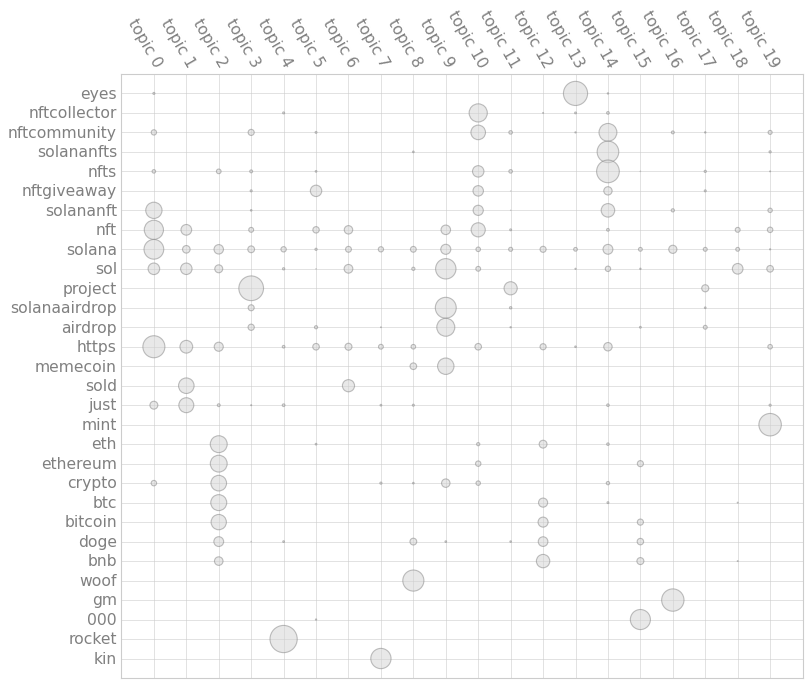

In [363]:
import textacy
from textacy import tm

model = tm.TopicModel('nmf', n_topics=20)
model.fit(doc_word)
doc_topic_matrix = model.transform(doc_word)
model.termite_plot(doc_word, vectorizer.get_feature_names(), topics=-1, n_terms=30, sort_terms_by='seriation', save='graph.png')


## Comparing Various Topic Scores to Daily Solana Prices to Look for Correlation

In [239]:
tweet_topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,raw_tweets,clean_tweets,date
0,0.016472,0.020081,0.000766,0.000000,0.000380,0.000000,0.000000,0.000306,0.000543,0.000000,...,0.000056,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Just got a tattoo done. #solana https://t.co/r...,just got a tattoo done solana https t co r...,2021-11-10 22:17:04+00:00
1,0.023067,0.000000,0.000000,0.000835,0.000000,0.005409,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.006496,0.000000,0.000000,0.000000,0.000000,0.003484,Another @GROMsclub post! Similar to @DeGodsNFT...,another gromsclub post similar to degodsnft...,2021-11-10 22:16:49+00:00
2,0.009735,0.000000,0.007735,0.000000,0.001822,0.000000,0.000000,0.000943,0.004666,0.000000,...,0.000054,0.000000,0.005259,0.000000,0.014711,0.002519,0.001300,"Now, time to publish short term plans 🎀\n\n⚡️ ...",now time to publish short term plans :ribbon:...,2021-11-10 22:15:50+00:00
3,0.003127,0.000095,0.000000,0.000000,0.083448,0.004571,0.000137,0.000000,0.001487,0.000000,...,0.000000,0.008706,0.000000,0.000000,0.015649,0.000387,0.000000,INCOMING #WolfDrop🚀🚀🚀 \n\nThis Wolf has gone o...,incoming wolfdrop:rocket::rocket::rocket: \n\...,2021-11-10 22:14:32+00:00
4,0.000000,0.000000,0.024521,0.000000,0.000114,0.000000,0.000000,0.000485,0.000000,0.000038,...,0.000000,0.019071,0.000000,0.001628,0.000000,0.035700,0.000000,Where are my fellow women in Crypto at? 💪💁‍♀️\...,where are my fellow women in crypto at :flexe...,2021-11-10 22:14:07+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27260,0.004927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000091,0.000000,0.000000,...,0.000000,0.020423,0.000000,0.000185,0.000000,0.000000,0.000000,@Adeshina_Ayo278 @jagowealth @cashdoptimist @T...,adeshina ayo278 jagowealth cashdoptimist t...,2021-11-01 06:17:42+00:00
27261,0.024665,0.000000,0.000000,0.004293,0.000000,0.030432,0.000000,0.000000,0.000000,0.001058,...,0.034404,0.010855,0.000000,0.000000,0.000000,0.000000,0.000000,We are growing fast..! 6000 members on our dis...,we are growing fast 6000 members on our dis...,2021-11-01 06:17:23+00:00
27262,0.004727,0.000000,0.000000,0.000000,0.000000,0.005312,0.000000,0.000000,0.000000,0.022803,...,0.057679,0.007068,0.000000,0.073639,0.000000,0.000000,0.012211,"GM creators, today is the start of a very impo...",gm creators today is the start of a very impo...,2021-11-01 06:17:02+00:00
27263,0.011178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003173,0.006413,0.024321,...,0.002640,0.000000,0.000831,0.000313,0.000000,0.000000,0.000000,Hopefully this will be one of the best project...,hopefully this will be one of the best project...,2021-11-01 06:14:32+00:00


In [274]:
topic_score_per_day = tweet_topic_matrix_df.groupby(tweet_topic_matrix_df.date.dt.day).mean()
topic_score_per_day

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
date,,,,,,,,,,,,,,,,,,,,
1,0.006818,0.005591,0.005864,0.010262,0.004791,0.004216,0.002274,0.001444,0.002713,0.007644,0.005792,0.002684,0.003953,0.002751,0.006733,0.001687,0.002379,0.008231,0.004354,0.003835
2,0.007385,0.010704,0.006290,0.006917,0.004134,0.004812,0.002808,0.001397,0.002077,0.007466,0.005538,0.001566,0.004144,0.002628,0.005823,0.001502,0.001910,0.008352,0.005244,0.003865
3,0.007623,0.006686,0.007059,0.005185,0.006529,0.004287,0.002549,0.001988,0.001375,0.005024,0.004642,0.001411,0.004391,0.003209,0.005613,0.002451,0.002277,0.009176,0.005380,0.005195
4,0.007436,0.004997,0.006947,0.005952,0.005254,0.004447,0.001234,0.002231,0.003003,0.006688,0.005257,0.002068,0.004339,0.003478,0.006719,0.003068,0.002350,0.007837,0.005794,0.005396
5,0.007855,0.004119,0.007312,0.005260,0.004224,0.004387,0.001501,0.002179,0.003278,0.004392,0.005580,0.001423,0.004811,0.003650,0.006805,0.004105,0.002368,0.007520,0.005565,0.005255
6,0.007600,0.003243,0.006401,0.004987,0.005363,0.004826,0.003798,0.003655,0.003898,0.003957,0.004734,0.001862,0.003734,0.003316,0.007263,0.001986,0.002006,0.008557,0.005228,0.005041
7,0.007250,0.006563,0.006235,0.005160,0.004559,0.004891,0.003895,0.004705,0.002620,0.004678,0.004454,0.001676,0.004730,0.003511,0.005921,0.003828,0.002057,0.007546,0.005195,0.004130
8,0.007682,0.004269,0.006565,0.005647,0.004247,0.004736,0.002620,0.002127,0.002781,0.005452,0.004293,0.002072,0.003730,0.003582,0.006395,0.002173,0.002526,0.008304,0.005833,0.004303
9,0.007651,0.003160,0.005940,0.008159,0.004100,0.004891,0.002186,0.001721,0.001691,0.004814,0.004958,0.002960,0.004077,0.002653,0.008006,0.002011,0.002219,0.006949,0.005542,0.003982


In [1]:
# 10 Day Solana Average Price
solana_price = [204.80, 211.71, 231.26, 242.81, 239.77, 247.68, 252.49, 247.20, 245.54, 233.17]

In [278]:
topic_score_per_day['solana_price'] = solana_price

In [279]:
topic_score_per_day

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,solana_price
date,,,,,,,,,,,,,,,,,,,,,
1,0.006818,0.005591,0.005864,0.010262,0.004791,0.004216,0.002274,0.001444,0.002713,0.007644,...,0.002684,0.003953,0.002751,0.006733,0.001687,0.002379,0.008231,0.004354,0.003835,204.80
2,0.007385,0.010704,0.006290,0.006917,0.004134,0.004812,0.002808,0.001397,0.002077,0.007466,...,0.001566,0.004144,0.002628,0.005823,0.001502,0.001910,0.008352,0.005244,0.003865,211.71
3,0.007623,0.006686,0.007059,0.005185,0.006529,0.004287,0.002549,0.001988,0.001375,0.005024,...,0.001411,0.004391,0.003209,0.005613,0.002451,0.002277,0.009176,0.005380,0.005195,231.26
4,0.007436,0.004997,0.006947,0.005952,0.005254,0.004447,0.001234,0.002231,0.003003,0.006688,...,0.002068,0.004339,0.003478,0.006719,0.003068,0.002350,0.007837,0.005794,0.005396,242.81
5,0.007855,0.004119,0.007312,0.005260,0.004224,0.004387,0.001501,0.002179,0.003278,0.004392,...,0.001423,0.004811,0.003650,0.006805,0.004105,0.002368,0.007520,0.005565,0.005255,239.77
6,0.007600,0.003243,0.006401,0.004987,0.005363,0.004826,0.003798,0.003655,0.003898,0.003957,...,0.001862,0.003734,0.003316,0.007263,0.001986,0.002006,0.008557,0.005228,0.005041,247.68
7,0.007250,0.006563,0.006235,0.005160,0.004559,0.004891,0.003895,0.004705,0.002620,0.004678,...,0.001676,0.004730,0.003511,0.005921,0.003828,0.002057,0.007546,0.005195,0.004130,252.49
8,0.007682,0.004269,0.006565,0.005647,0.004247,0.004736,0.002620,0.002127,0.002781,0.005452,...,0.002072,0.003730,0.003582,0.006395,0.002173,0.002526,0.008304,0.005833,0.004303,247.20
9,0.007651,0.003160,0.005940,0.008159,0.004100,0.004891,0.002186,0.001721,0.001691,0.004814,...,0.002960,0.004077,0.002653,0.008006,0.002011,0.002219,0.006949,0.005542,0.003982,245.54


<AxesSubplot:xlabel='date', ylabel='topic_4'>

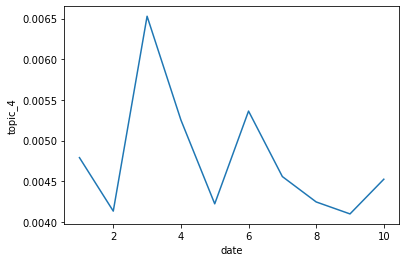

In [276]:
sns.lineplot(data = topic_score_per_day, x ='date', y = 'topic_4')

In [349]:
import matplotlib.style as style 
style.available

sns.set_context('talk')
style.use('bmh')

### Topic 4 Regards Optimism

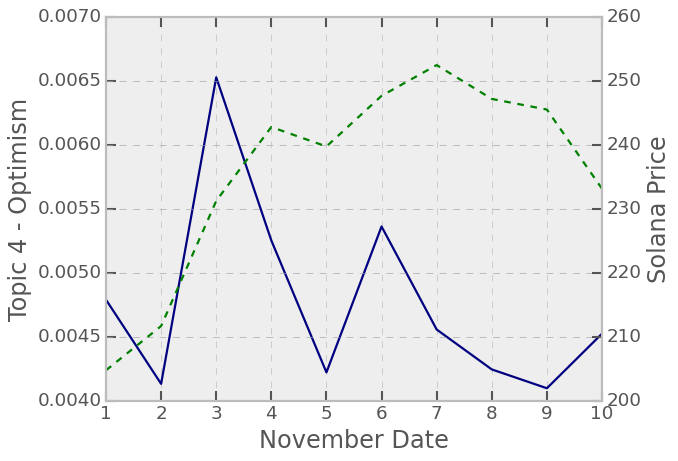

In [352]:
p = sns.lineplot(data= topic_score_per_day, x ='date', y = 'topic_4', color = 'navy')
ax2 = plt.twinx()
p2 = sns.lineplot(data= topic_score_per_day, x ='date', y = 'solana_price', color = 'g', ax=ax2, linestyle = 'dashed')
p.set(xlabel = 'November Date', ylabel = 'Topic 4 - Optimism')
p2.set(ylabel = 'Solana Price')
plt.savefig('Topic4_Sol.png',dpi=300, bbox_inches = "tight")

### Topic 2 Regards Comparison to Other Coins

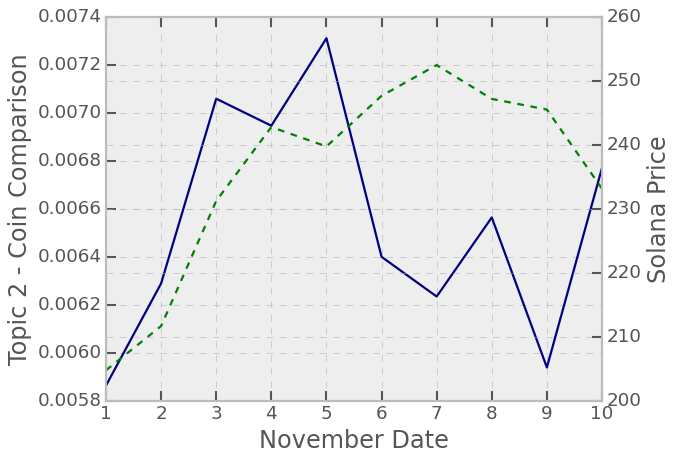

In [371]:
p = sns.lineplot(data= topic_score_per_day, x ='date', y = 'topic_2', color = 'navy')
ax2 = plt.twinx()
p2 = sns.lineplot(data= topic_score_per_day, x ='date', y = 'solana_price', color = 'g', ax=ax2, linestyle = 'dashed')
p.set(xlabel = 'November Date', ylabel = 'Topic 2 - Coin Comparison')
p2.set(ylabel = 'Solana Price')
plt.savefig('Topic2_Sol.png',dpi=300, bbox_inches = "tight")

### Topic 13 Regards Anticipation, which appeared to have the strongest correlation of the topics examined

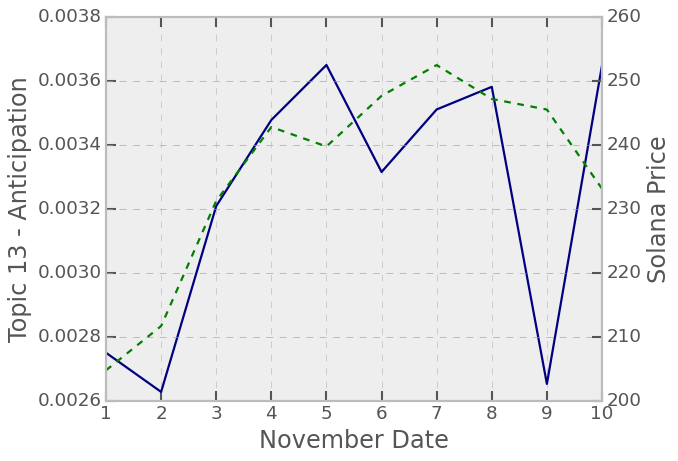

In [369]:
p = sns.lineplot(data= topic_score_per_day, x ='date', y = 'topic_13', color = 'navy')
ax2 = plt.twinx()
p2 = sns.lineplot(data= topic_score_per_day, x ='date', y = 'solana_price', color = 'g', ax=ax2, linestyle = 'dashed')
p.set(xlabel = 'November Date', ylabel = 'Topic 13 - Anticipation')
p2.set(ylabel = 'Solana Price')
plt.savefig('Topic13_Sol.png',dpi=300, bbox_inches = "tight")